In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
train=pd.read_csv("train_loan.csv")
test=pd.read_csv("test_loan.csv")

In [3]:
train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [4]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [6]:
test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

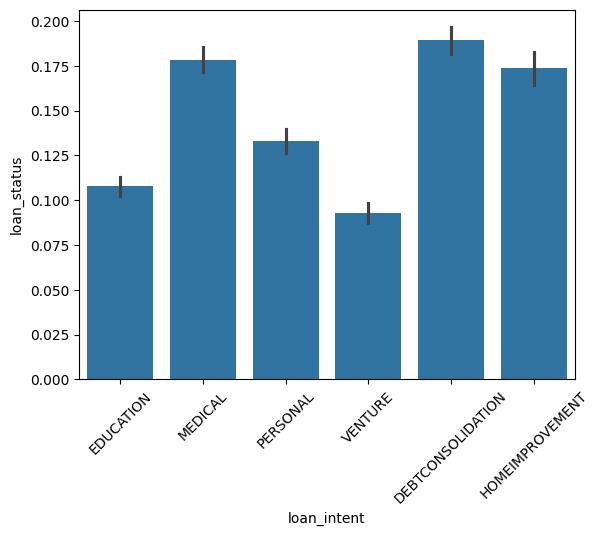

In [7]:
sns.barplot(data=train,x='loan_intent',y="loan_status")
plt.xticks(rotation=45)
plt.show()

The Loan intent seems to influence the loan approval status with people with the DebtConsolidation ,Medical and HomeImprovement having the highest loan approval

C:\Users\gacha\AppData\Local\Temp\ipykernel_16748\1077053363.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train,x="person_home_ownership",y="loan_status",palette="viridis")


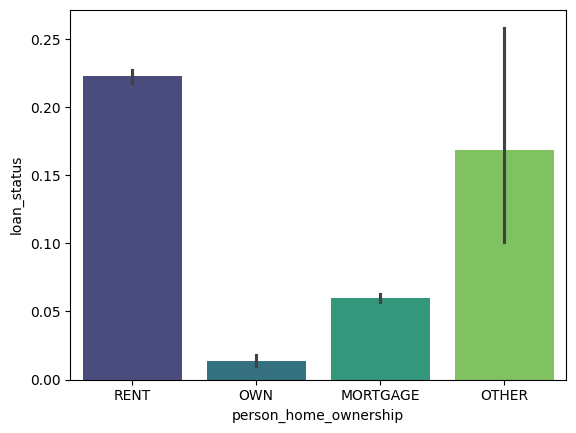

In [8]:
sns.barplot(data=train,x="person_home_ownership",y="loan_status",palette="viridis")
plt.show()

so It seems like theres a less influence in the person home ownership to the loan aprroval status  although people who are Renting and are others seem to have a higher loan approval

C:\Users\gacha\AppData\Local\Temp\ipykernel_16748\2767351293.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train,x="loan_grade",y="loan_status",palette="inferno")


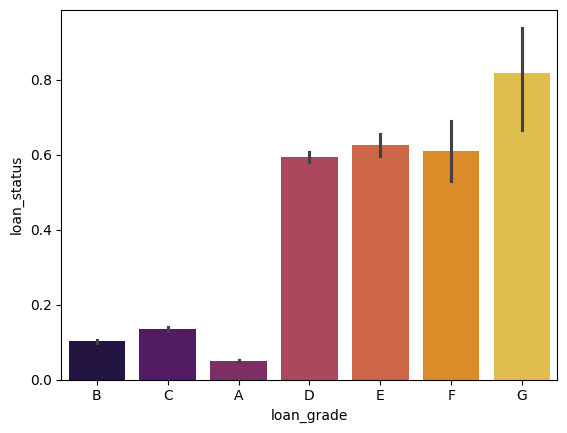

In [9]:
sns.barplot(data=train,x="loan_grade",y="loan_status",palette="inferno")
plt.show()

People with the loan grade of G seems to have the highest loan approval with loan A with the lowest approval rate

In [10]:
correlation, p_value = pearsonr(train['person_income'], train['loan_status'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation Coefficient: -0.17, P-value: 0.0000


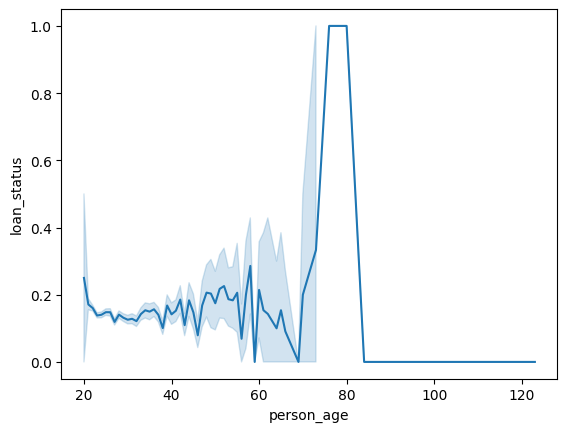

In [11]:
sns.lineplot(data=train,x="person_age",y="loan_status")
plt.show()

It seems like people with an age of around 70-80 have a higher loan aptoval and people past that have a 0-None 

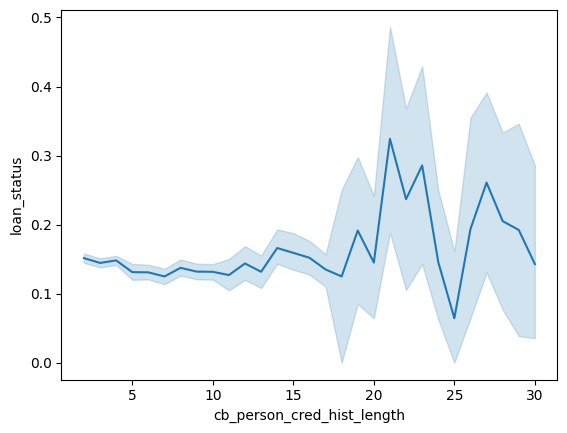

In [12]:
sns.lineplot(data=train,x="cb_person_cred_hist_length",y="loan_status")
plt.show()

So it actually seems people with credit history length actually influences the loan status .
where people with a 21-23 has a higher loan aproval status compared to the other


In [13]:
df2=train

In [14]:
df2[df2.select_dtypes(['object']).columns] = df2.select_dtypes(['object']).apply(lambda x: pd.Categorical(x).codes)

Text(0.5, 1.0, 'LINEAR COORELATION ')

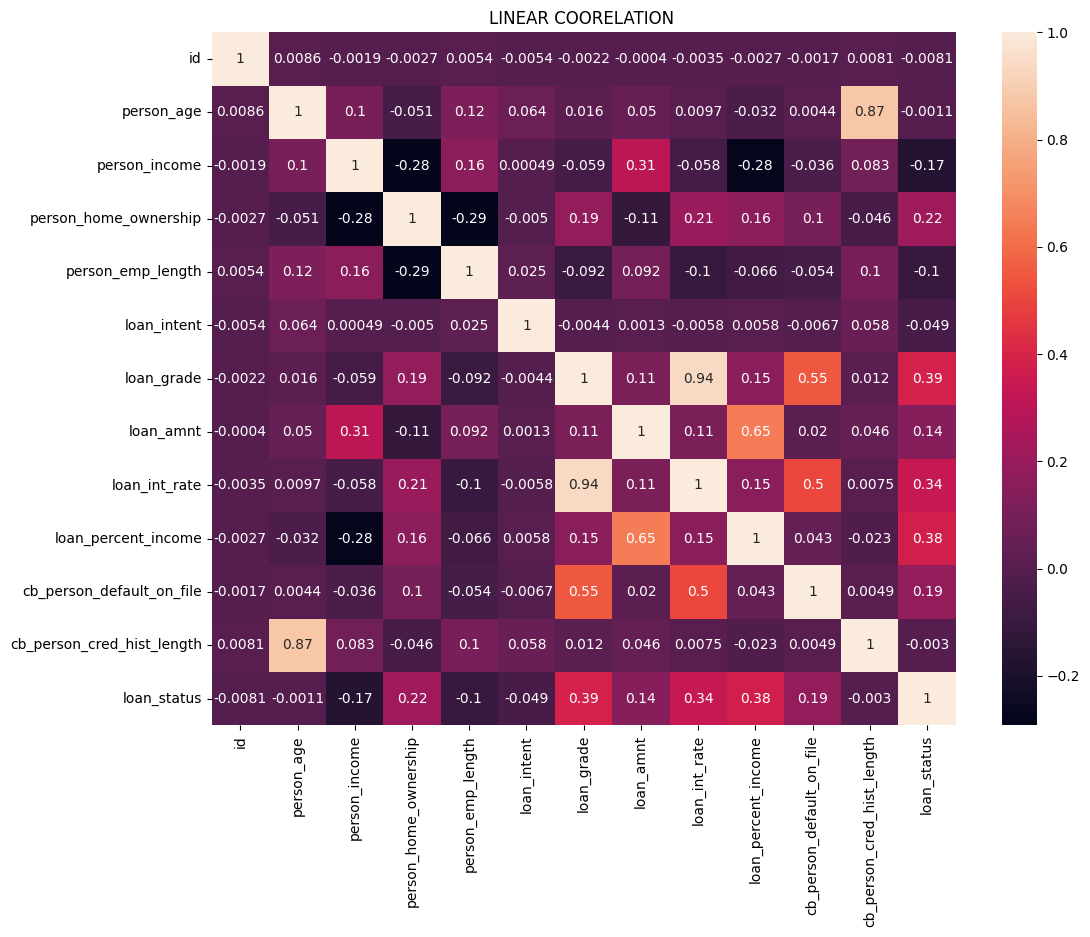

In [15]:
plt.figure(figsize=(12,9))
sns.heatmap(df2.corr(),annot=True)
plt.title("LINEAR COORELATION ")

So theres a higher cooorelation between Loan_status and the folowing columns
cb_person_defult_on_file 0.19
loan_percent_income 0.38
loan_int_rate 0.34
loan_amount 0.14
loan_grade 0.39
person_emp_length -0.1
person_home_ownership -0.17


In [16]:
X=df2[['cb_person_default_on_file',"loan_percent_income","loan_int_rate","loan_amnt","loan_grade","person_emp_length","person_home_ownership"]]
y=df2["loan_status"]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred=lr.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
accuracy=accuracy_score(y_test,y_pred)

In [22]:
print(accuracy)

0.8814903231307016


In [23]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[9881  206]
 [1184  458]]


In [24]:
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"Precision: {precision}")
print(f"recall: {precision}")
print(f"f1: {precision}")

Precision: 0.6897590361445783
recall: 0.6897590361445783
f1: 0.6897590361445783


In [25]:
roc_auc=roc_auc_score(y_test,y_pred)
print(f"ROC-AUC SCORE: {roc_auc}")

ROC-AUC SCORE: 0.6292529053265821


In [26]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= 0.6).astype(int)

In [27]:
accuracy_score(y_test,y_pred_adjusted)

0.8767158325517947

In [28]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [29]:
y_pred=model.predict(X_test)

In [30]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9277005712336943


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9326455793332765


In [32]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[9904  183]
 [ 607 1035]]


In [33]:
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print(f"Precision: {precision}")
print(f"recall: {precision}")
print(f"f1: {precision}")

Precision: 0.8497536945812808
recall: 0.8497536945812808
f1: 0.8497536945812808


In [43]:
oob_error=1-model.oob_score_
print(f"OOB Error: {oob_error}")

OOB Error: 0.05170943814476936


In [46]:
test[test.select_dtypes(['object']).columns] = test.select_dtypes(['object']).apply(lambda x: pd.Categorical(x).codes)
X_test=test

In [47]:
y_pred_test=model.predict(X_test)
X_test["loan_approval_prediction"]=y_pred_test

In [50]:
test_data=X_test[["id","loan_approval_prediction"]]

In [51]:
test_data.to_csv("Loan_prediction_final.csv",index=False)